# Modeling data to predict precipitation value in WIZNA

The aim of this notebook is to use ARIMA model in order to predict precipitation value. The main taks consists on establishing right values of parameters used in ARIMA model.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error


In [3]:
data = pd.read_csv('Data/Merged_Data/precipitat_data_WIZNA_1951_2019.csv')

In [4]:
data


,station_ID,station_name,year,month,total_precip,SUMN_status,n_snow_fall,LDS_status,max_precip,MAXO_status,first_day_max_precip,last_day_max_precip,n_snow_cover,LDPS_status
0,253220190,WIZNA,1951,1,25.8,NaN,6,NaN,8.1,NaN,7.0,NaN,0,8.0
1,253220190,WIZNA,1951,2,4.4,NaN,3,NaN,2.6,NaN,18.0,NaN,0,8.0
2,253220190,WIZNA,1951,3,41.0,NaN,3,NaN,21.5,NaN,23.0,NaN,0,8.0
3,253220190,WIZNA,1951,4,48.4,NaN,0,NaN,32.1,NaN,1.0,NaN,0,8.0
4,253220190,WIZNA,1951,5,48.3,NaN,0,NaN,20.8,NaN,21.0,NaN,0,8.0
5,253220190,WIZNA,1951,6,41.8,NaN,0,NaN,17.2,NaN,27.0,NaN,0,8.0
6,253220190,WIZNA,1951,7,31.5,NaN,0,NaN,6.9,NaN,13.0,NaN,0,8.0
7,253220190,WIZNA,1951,8,38.8,NaN,0,NaN,23.9,NaN,9.0,NaN,0,8.0
8,253220190,WIZNA,1951,9,0.1,NaN,0,NaN,0.1,NaN,1.0,NaN,0,8.0
9,253220190,WIZNA,1951,10,0.0,NaN,0,NaN,0.0,NaN,5.0,19.0,0,8.0


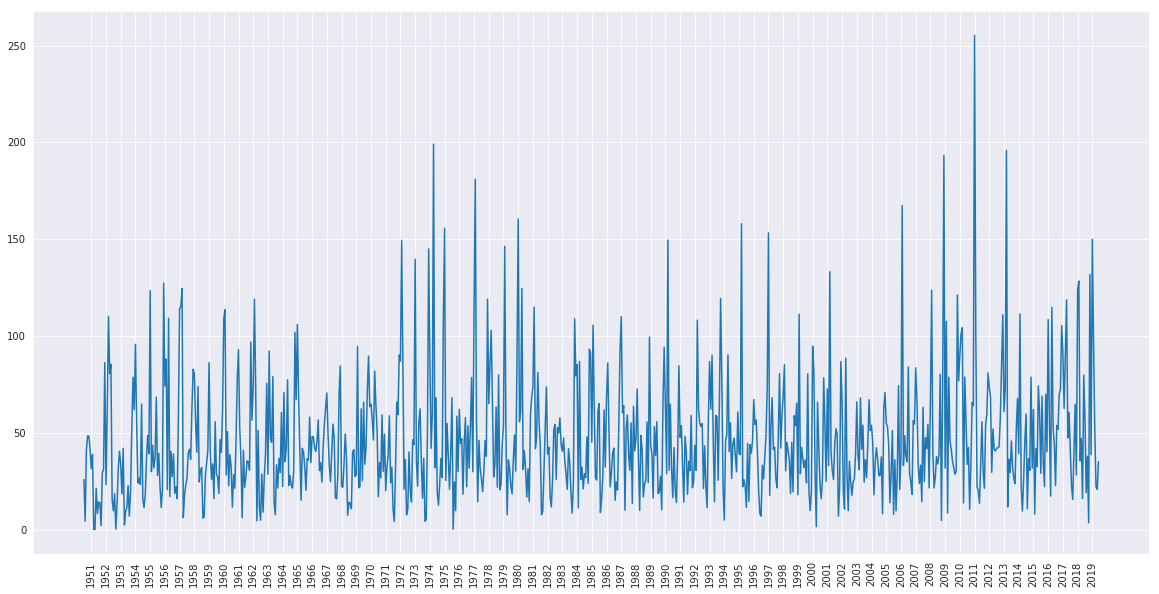

In [5]:
plt.figure(figsize=(20,10))
x_labels_index = data.iloc[6::12].index
x_label = data.iloc[6::12]['year']
plt.xticks(x_labels_index, x_label, rotation=90) 
ax_lineplot = sns.lineplot(data=data['total_precip'])
plt.show()

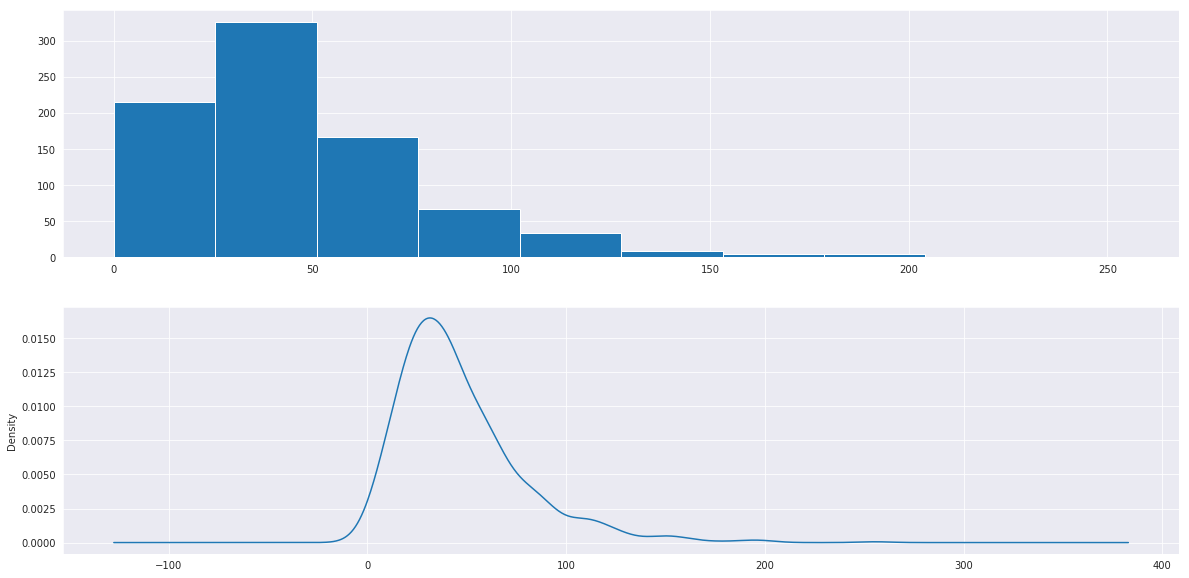

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(211)
data['total_precip'].hist()
plt.subplot(212)
data['total_precip'].plot(kind='density')
plt.show()

# Spliting data into training data and testing data

In [7]:
def prepare_data_for_arima(dataset, training_size=0.8):
    dataset_len = len(dataset)
    limit = int(training_size * dataset_len)
    training = dataset[:limit]
    testing = dataset[limit:]
    return training, testing

In [13]:
data_precip = data.total_precip

In [14]:
train_data_precip, test_data_precip = prepare_data_for_arima(data_precip, training_size=0.8)


# Model Validation Metric




In [15]:


#Mean Absolute Percentage Error
def MAPE(y_true, predictions):
    diff = predictions - y_true
    MAPE = np.mean(np.abs(diff)/np.abs(y_true))
    return MAPE

# predykcja naiwna


In [16]:
def naive_prediction(train_dataset, test_dataset, lag):
    predictions = []
    observations = []
    for i in range(len(test_dataset)):
        #what is a current observation
        current_observation = test_dataset.iloc[i]         
        observations.append(current_observation)
       #what is a prediction based on "lag"
        prediction_index = i - lag
        if prediction_index<0:
            predictions.append(train_dataset.iloc[prediction_index])
        else:
            predictions.append(test_dataset.iloc[prediction_index])
    return predictions

In [17]:
# evaluating naive prediction for lag value equal to 12
naive_pred_12 = naive_prediction(train_data_precip, test_data_precip,12)
print(MAPE(test_data_precip, naive_pred_12))

0.9053388679441238


In [18]:
# MAPE errors depending on lag value
def evaluate_naive_prediction():
    errors_depending_on_lag = []
    for i in range(121):
        predictions = naive_prediction(train_data_precip, test_data_precip,i)
        errors_depending_on_lag.append((i, MAPE(test_data_precip, predictions), mean_squared_error(test_data_precip, predictions)))
        errors_depending_on_lag.sort(key=lambda x: x[1])
#       # convert to data frame
        df_errors_depending_on_lag= pd.DataFrame(errors_depending_on_lag, columns =['lag [years]', 'MAPE', 'MSE'])
    return df_errors_depending_on_lag

In [19]:
evaluate_naive_prediction().head()

,lag [years],MAPE,MSE
0,0,0.000000,0.000000
1,84,0.733990,1881.882530
2,120,0.767704,1955.963855
3,60,0.777192,2177.769518
4,97,0.778013,2170.832289


WNIOSEK: Najmniejszy procentowy błąd w predykcji naiwnej otrzymałem używając parametru lag = 84 czyli 7lat\*12 miesięcy. Być może to jest nadinterpretacja ale w przypadku naiwnej predykcji najmniej model się mylił biorąc dane z analogicznego miesiąca sprzed 7 lat

# Użycie modelu ARIMA

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox

In [21]:
fuller_test = adfuller(train_data_precip)
print('ADF:', fuller_test[0])
print('p-value:', fuller_test[1])
print('critical_values:', fuller_test[4])

ADF: -6.906744892943194
p-value: 1.241659286540387e-09
critical_values: {'1%': -3.4405768522418607, '5%': -2.8660524488494903, '10%': -2.569173076930542}


WNIOSEK: Seria danych jest stacjonarna

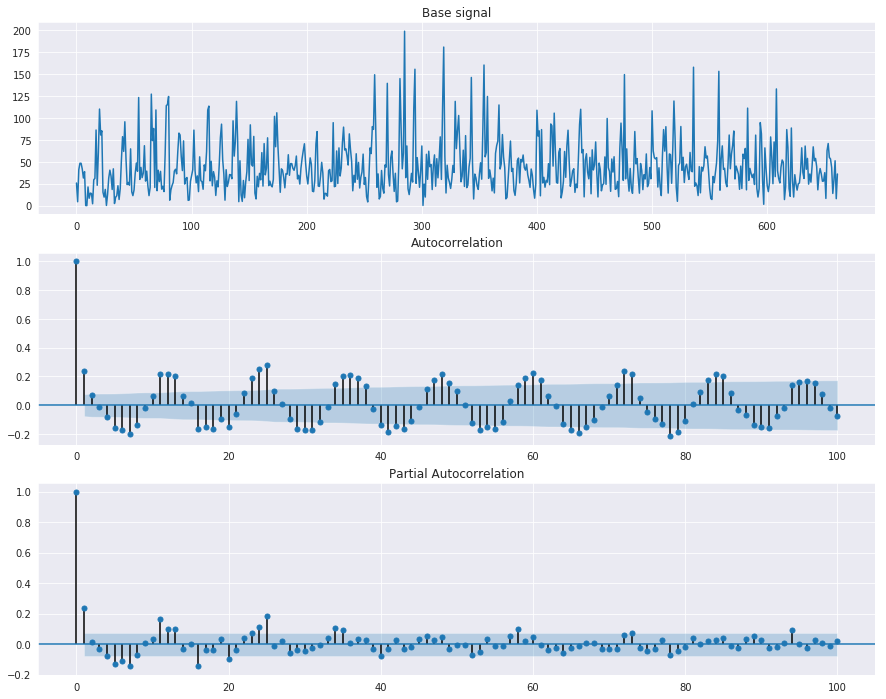

In [22]:
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(15, 12))
axes[0].plot(train_data_precip.values)
axes[0].set_title('Base signal')
plot_acf(train_data_precip.values, ax = axes[1], lags=100)
plot_pacf(train_data_precip.values, ax = axes[2], lags=100)
plt.show()

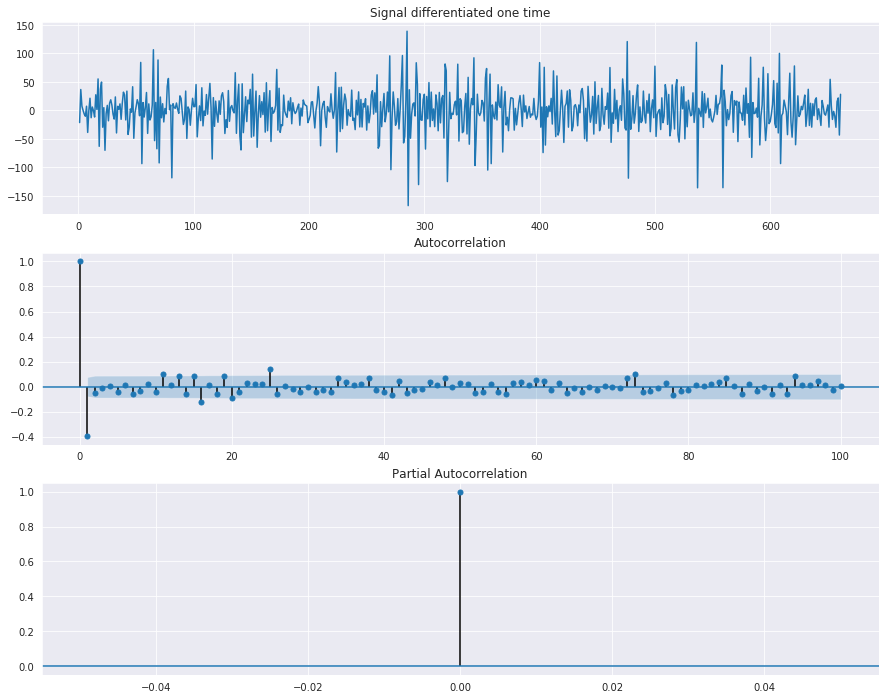

In [23]:
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(15, 12))
axes[0].plot(train_data_precip.diff().values)
axes[0].set_title('Signal differentiated one time')
plot_acf(train_data_precip.diff().dropna().values, ax = axes[1],lags=100)
plot_pacf(train_data_precip.diff().values, ax = axes[2], lags=100)
plt.show()

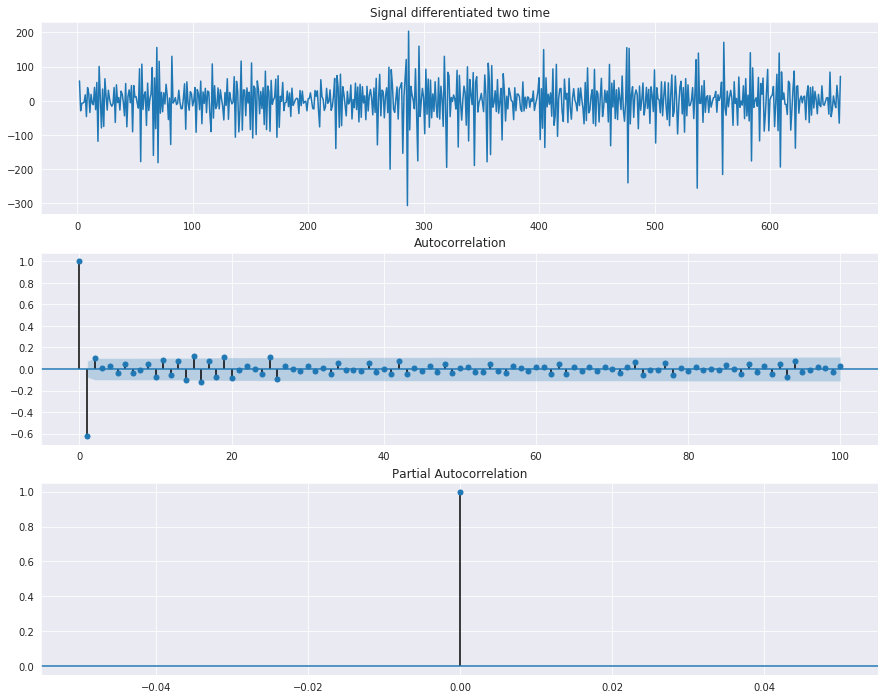

In [24]:
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(15, 12))
axes[0].plot(train_data_precip.diff().diff().values)
axes[0].set_title('Signal differentiated two time')
plot_acf(train_data_precip.diff().diff().dropna().values, ax = axes[1], lags=100)
plot_pacf(train_data_precip.diff().values, ax = axes[2], lags=100)
plt.show()

WNIOSEK: Parametr d powinien mieć wartość 0

# Na podstawie analizy autokorelacji, stacjonarności częściowej autokorelacji dobieram wstępnie parametry dla modelu ARIMA

In [25]:
# Prediction for the model 
# AR=0 ()
# I = 1
# MA = 0(p, d, q)


In [30]:
model = ARIMA(train_data_precip.values, order=(1,0,0))
model_fit = model.fit(trend='nc')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  662
Model:                     ARMA(1, 0)   Log Likelihood               -3280.203
Method:                       css-mle   S.D. of innovations             34.308
Date:                Wed, 11 Mar 2020   AIC                           6564.406
Time:                        23:08:10   BIC                           6573.396
Sample:                             0   HQIC                          6567.890
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7662      0.025     30.796      0.000       0.717       0.815
                                    Roots                                    
                  Real          Imaginary           M

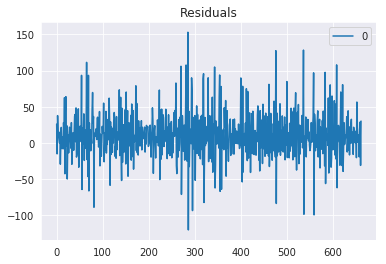

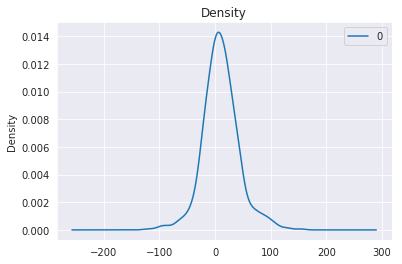

In [31]:
# Analiza reziduów
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
residuals.plot(kind='kde', title='Density')
plt.show()

In [32]:
# O czym świadczy taki rozkład reziduów?
# Nie jest idealnie 9 tylko jest przesunięty w stronę 100. Co to może oznaczać?

### Sprawdzenie wykresu dopasowania modelu do danych

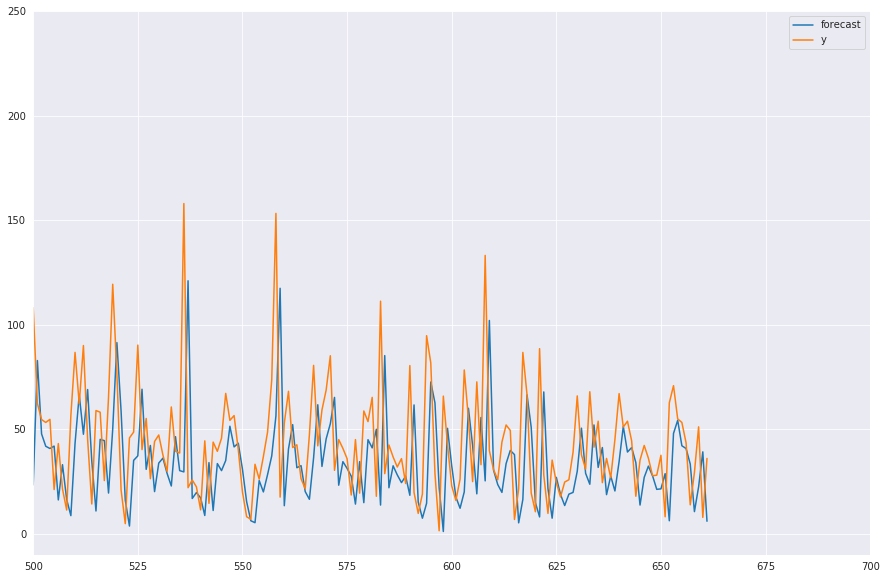

In [33]:
# fig, ax = plt.subplot(1, 1, figsize=(15, 7))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.axis([500, 700, -10, 250])
model_fit.plot_predict(dynamic=False, ax=ax)
plt.show()

### Ewaluacja modelu

In [72]:
# evaluate an ARIMA model for a given order (p,d,q)
def predict_with_arima_model(train_dataset, test_dataset, arima_order):
    history = [x for x in train_dataset]
    # make predictions
    predictions = list()
    for t in range(len(test_dataset)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        one_step_prediction = model_fit.forecast()[0]
        predictions.extend(one_step_prediction)
        history.append(test_dataset.iloc[t])# calculate out of sample error
    return predictions

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(y_true, predictions):
    MSE_err = mean_squared_error(y_true, predictions)
    MAPE_err = MAPE(y_true, predictions)
    return MSE_err, MAPE_err

In [75]:
# evaluation of trained ARIMA MODEL
order=(1,0,0)
predictions = predict_with_arima_model(train_data_precip, test_data_precip, order)
evaluate_arima_model(test_data_precip, prediction)

(1524.176926304195, 0.7898649391844134)

### Sprawdzenie wykresu predykcji danych dla danych testowych (walidacyjnych)

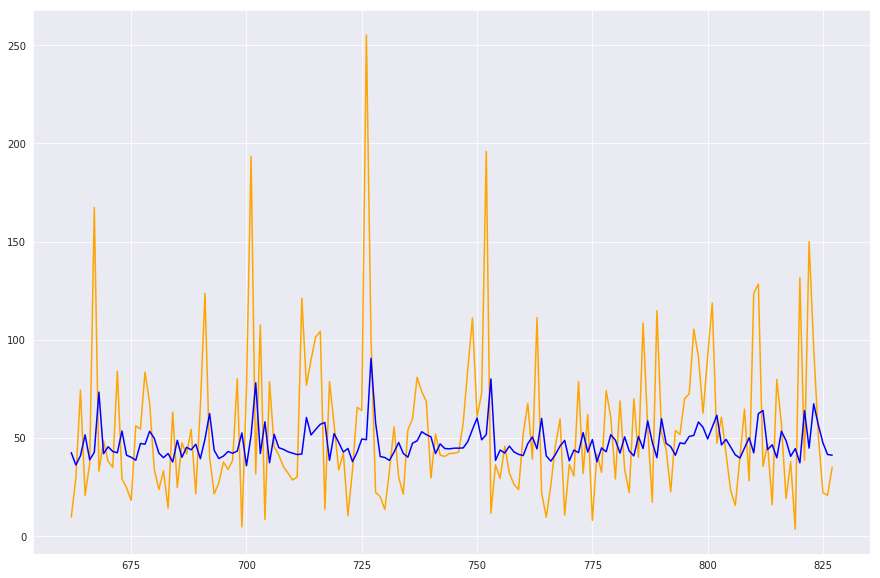

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# plt.axis([500, 700, -10, 250])
plt.plot(test_data_precip.index, test_data_precip, c='orange')
plt.plot(test_data_precip.index, predictions, c='blue')
plt.show()

# Tuning the model


In [88]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train_data, test_data, p_values, d_values, q_values):
    train_data = train_data.astype('float32')
    test_data = test_data.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    predictions = predict_with_arima_model(train_data, test_data, order)
                    errors = evaluate_arima_model(test_data, predictions)
                    if errors[0] < best_score:
                        best_score = errors[0]
                        best_cfg = order
                    print(f'ARIMA MSE:{errors[0]}, MAPE {erros[1]}: , hyperparameters: {order}')
                except:
                    continue
    print(f'Best ARIMA model: {best_cfg}, best_score: {best_score}')

In [ ]:
# evaluate parameters
p_values = [0, 1, 6, 12]
d_values = range(0, 3) #should be 0 as the Time Series is stationary
q_values = range(0,3)
evaluate_models(train_data_precip, test_data_precip, p_values, d_values, q_values)